In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
CLUSTERS_DATA_PATH = "../data/processed/feature_engineering/features_skills_clusters.pkl"
ENC_DATA_PATH = "../data/processed/2020/onehotencoded_df.pkl"

EXPORT_PATH = "../data/processed/clean_data/"

In [126]:
FEATS = [
    'LanguageWorkedWith',
     'DatabaseWorkedWith',
     'PlatformWorkedWith',
     'WebframeWorkedWith',
     'MiscTechWorkedWith',
] 

LABELS = ['DevType']

In [127]:
enc_raw_df = pd.read_pickle(ENC_DATA_PATH)
clusters_df = pd.read_pickle(CLUSTERS_DATA_PATH)
enc_raw_df

LanguageWorkedWith                                                   \
                Assembly Bash/Shell/PowerShell  C C# C++ Dart Go HTML/CSS   
0                      0                     0  0  1   0    0  0        1   
1                      0                     0  0  0   0    0  0        0   
2                      0                     0  0  0   0    0  0        0   
3                      0                     0  0  0   0    0  0        0   
4                      0                     0  0  0   0    0  0        1   
...                  ...                   ... .. ..  ..  ... ..      ...   
64456                  0                     0  0  0   0    0  0        0   
64457                  1                     1  1  1   1    1  1        1   
64458                  0                     0  0  0   0    0  0        0   
64459                  0                     0  0  0   0    0  0        1   
64460                  0                     0  0  1   0    0  0        1   

                    ...           DevType                          \
      Haskell Java  ... Developer, mobile Educator Engineer, data   
0           0    0  ...                 0        0              0   
1           0    0  ...                 1        0              0   
2           0    0  ...                 0        0              0   
3           0    0  ...                 0        0              0   
4           0    0  ...                 0        0              0   
...       ...  ...  ...               ...      ...            ...   
64456       0    0  ...                 0        0              0   
64457       1    1  ...                 0        0              0   
64458       0    0  ...                 0        0              0   
64459       0    0  ...                 0        0              0   
64460       0    1  ...                 0        0              0   

                                                      \
      Engineer, site reliability Engineering manager   
0                              0                   0   
1                              0                   0   
2                              0                   0   
3                              0                   0   
4                              0                   0   
...                          ...                 ...   
64456                          0                   0   
64457                          0                   0   
64458                          0                   0   
64459                          0                   0   
64460                          0                   0   

                                                                 \
      Marketing or sales professional Product manager Scientist   
0                                   0               0         0   
1                                   0               0         0   
2                                   0               0         0   
3                                   0               0         0   
4                                   0               0         0   
...                               ...             ...       ...   
64456                               0               0         0   
64457                               0               0         0   
64458                               0               0         0   
64459                               0               0         0   
64460                               0               0         0   

                                                
      Senior executive/VP System administrator  
0                       0                    0  
1                       0                    0  
2                       0                    0  
3                       0                    0  
4                       0                    0  
...                   ...                  ...  
64456                   1                    0  
64457                   0                    0  
64458          

## Sanity check

In [128]:
####################################
# check if the clusters correspond to the original 
# one_hot_encoded features
####################################

# Select random int
i = np.random.randint(enc_raw_df.shape[0])

# Print original values
print(enc_raw_df.iloc[i][LABELS].tolist())
print(enc_raw_df.iloc[i][FEATS].tolist())
print("----------------")

# Print processed
print(enc_raw_df.iloc[i][enc_raw_df.iloc[i] == 1])
print("----------------")

# Check clustering 
CLUSTERS_NBR = clusters_df.iloc[i].sum(axis=0)
SKILLS_NBR = enc_raw_df[FEATS].iloc[i].sum(axis=0)
print("Clusters:", CLUSTERS_NBR)
print("Skills:",  SKILLS_NBR)

print("----------------")
if CLUSTERS_NBR == SKILLS_NBR:
    print(f".. Sanity check passed")
else : 
    print(f".. Sanity check failed")

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
----------------
LanguageWorkedWith  JavaScript               1
DatabaseWorkedWith  Microsoft SQL Server     1
                    MySQL                    1
PlatformWorkedWith  AWS                      1
                    Linux                    1
                    MacOS                    1
MiscTechWorkedWith  Node.js                  1
                    React Native             1
DevType             Developer, back-end      1
                    Developer, full-stack    1
Name: 37722, dtype: int64
----------------
Clusters: 8
Skills: 8
----------------
.. Sanity check passed


## Exclude Roles


In [129]:
####################################
# We are exclusing some jobs as they are not critical
# for our business case and they may introduce some bias 
# and they may introduce some bias 
####################################

EXCLUDED_DEV_TYPES = [
    'Designer',
    'Educator',
    'Marketing or sales professional',
    'Engineering manager',
    'Senior executive/VP',
    'Product manager',
    'Engineer, site reliability'
    ]



In [130]:
# Check the total samples of roles
original_role_size_b = enc_raw_df["DevType"].columns.shape[0]
original_role_size_b

23

In [131]:
# Check the total samples of roles
original_role_sum = enc_raw_df["DevType"].sum(axis=0)
original_role_sum

Academic researcher                               3552
Data or business analyst                          4024
Data scientist or machine learning specialist     3988
Database administrator                            5722
Designer                                          5321
DevOps specialist                                 5969
Developer, QA or test                             3947
Developer, back-end                              27228
Developer, desktop or enterprise applications    11784
Developer, embedded applications or devices       4750
Developer, front-end                             18296
Developer, full-stack                            27125
Developer, game or graphics                       2789
Developer, mobile                                 9482
Educator                                          2928
Engineer, data                                    3738
Engineer, site reliability                        1940
Engineering manager                               2724
Marketing 

In [132]:
for role in EXCLUDED_DEV_TYPES:
    enc_raw_df = enc_raw_df.drop(("DevType", role), axis=1)

In [133]:
# Check the total samples of roles
original_role_size_a = enc_raw_df["DevType"].columns.shape[0]
original_role_size_a

16

In [134]:
# Check the total samples of roles
original_role_sum = enc_raw_df["DevType"].sum(axis=0)
original_role_sum

Academic researcher                               3552
Data or business analyst                          4024
Data scientist or machine learning specialist     3988
Database administrator                            5722
DevOps specialist                                 5969
Developer, QA or test                             3947
Developer, back-end                              27228
Developer, desktop or enterprise applications    11784
Developer, embedded applications or devices       4750
Developer, front-end                             18296
Developer, full-stack                            27125
Developer, game or graphics                       2789
Developer, mobile                                 9482
Engineer, data                                    3738
Scientist                                         2086
System administrator                              5242
dtype: int64

In [135]:
####################################
# SANITY CHECK 
####################################

if original_role_size_a + len(EXCLUDED_DEV_TYPES) == original_role_size_b   \
        and \
        original_role_size_b > original_role_size_a:
    print(f".. Sanity check passed")
else : 
    print(f".. Sanity check failed")

.. Sanity check passed


## Filter data

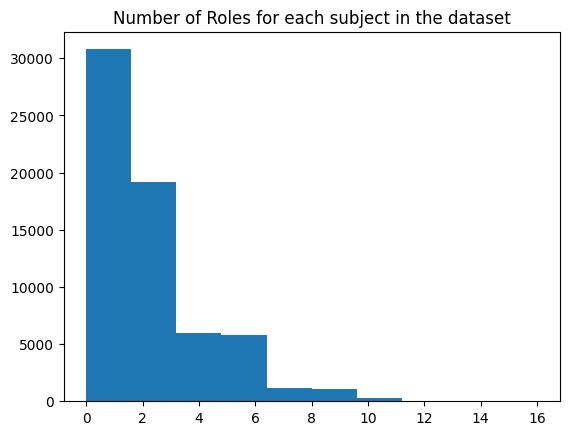

In [136]:
jobs_freq = enc_raw_df[LABELS].sum(axis=1)
plt.hist(jobs_freq)
plt.title('Number of Roles for each subject in the dataset')
plt.show()

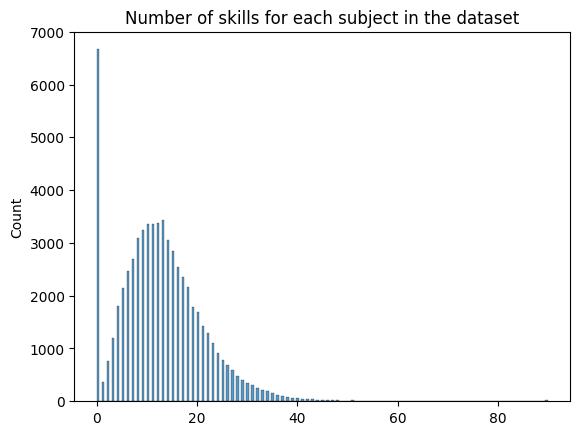

In [137]:
skills_freq = enc_raw_df[FEATS].sum(axis=1)
sns.histplot(skills_freq)
plt.title('Number of skills for each subject in the dataset')
plt.show()

In [138]:
# Filter frequencies 
ROLES_RANGE = [1,3]
TECH_RANGE  = [3,30]

In [139]:
# Create masks 
role_mask   = (jobs_freq >= ROLES_RANGE[0]) & (jobs_freq <= ROLES_RANGE[1])
tech_mask   = (skills_freq >= TECH_RANGE[0])   & (skills_freq <= TECH_RANGE[1])
filter_mask = role_mask & tech_mask

In [140]:
clusters_df = clusters_df.loc[filter_mask].copy()
enc_raw_df = enc_raw_df.loc[filter_mask].copy()

### Sanity Checks

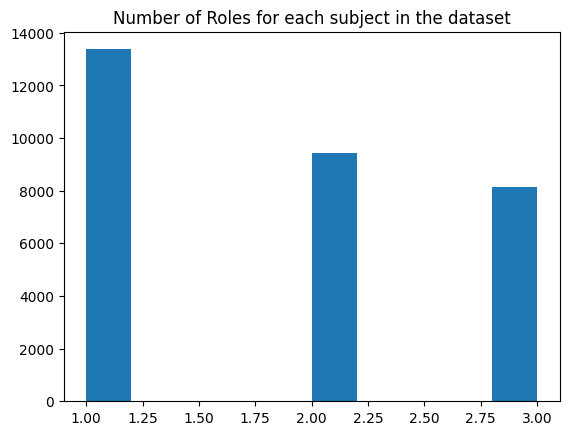

In [141]:
jobs_freq = enc_raw_df[LABELS].sum(axis=1)
plt.hist(jobs_freq)
plt.title('Number of Roles for each subject in the dataset (After filter)')
plt.show()

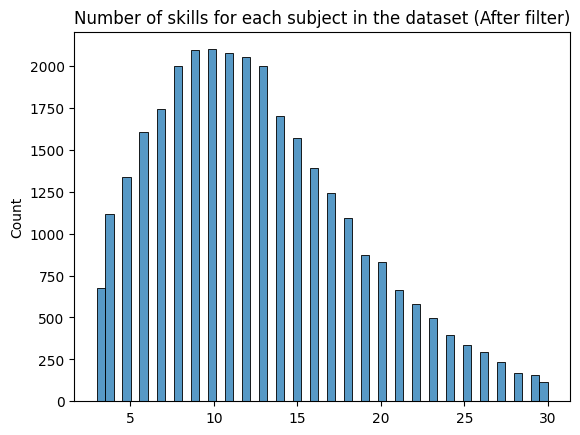

In [142]:
skills_freq = enc_raw_df[FEATS].sum(axis=1)
sns.histplot(skills_freq)
plt.title('Number of skills for each subject in the dataset (After filter)')
plt.show()

## Export data

In [143]:
# Add second level indexing 
clusters_df.columns = pd.MultiIndex.from_product([['skills_clusters'], 
                                                  clusters_df.columns])
clusters_df

skills_clusters                                                 \
       skills_group_0 skills_group_1 skills_group_10 skills_group_11   
0                   7              0               0               0   
1                   0              0               0               0   
5                   0              0               1               0   
7                   0              2               0               0   
8                   0              0               0               0   
...               ...            ...             ...             ...   
64422               1              3               1               0   
64428               0              0               0               0   
64429               1              1               4               0   
64447               3              0               2               0   
64453               1              0               0               0   

                                                                       \
      skills_group_12 skills_group_13 skills_group_14 skills_group_15   
0                   0               0               0               0   
1                   0               0               0               0   
5                   0               0               0               0   
7                   0               0               0               0   
8                   0               0               0               0   
...               ...             ...             ...             ...   
64422               0               0               0               0   
64428               0               0               1               0   
64429               3               0               0               0   
64447               0               0               0               0   
64453               0               0               0               0   

                                                                      \
      skills_group_16 skills_group_17 skills_group_18 skills_group_2   
0                   0               0               0              0   
1                   2               0               0              0   
5                   0               0               0              0   
7                   0               0               0              0   
8                   0               0               0              0   
...               ...             ...             ...            ...   
64422               0               0               0              0   
64428               0               0               0              0   
64429               0               2               0              0   
64447               1               0               0              0   
64453               1               0               0              0   

                                                                   \
      skills_group_3 skills_group_4 skills_group_5 skills_group_6   
0                  0              0              1              0   
1                  0              1              0              0   
5                  0              0              1              1   
7                  0              0              2              2   
8                  0              0              0              2   
...              ...            ...            ...            ...   
64422              0              0              1              1   
64428              0              0              0              5   
64429              0              2              0              1   
64447              0              0              0              1   
64453              1              0              0              0   

                                                    
      skills_group_7 skills_group_8 skills_group_9  
0                  0              1              2  
1                  0              0              1  
5                  0              1              2  
7                  

In [145]:
# Concatenate
final_df = pd.concat([enc_raw_df, clusters_df], axis=1)
final_df

LanguageWorkedWith                                                   \
                Assembly Bash/Shell/PowerShell  C C# C++ Dart Go HTML/CSS   
0                      0                     0  0  1   0    0  0        1   
1                      0                     0  0  0   0    0  0        0   
5                      0                     0  0  0   0    0  0        1   
7                      0                     0  0  0   0    0  0        0   
8                      0                     0  0  0   0    0  0        1   
...                  ...                   ... .. ..  ..  ... ..      ...   
64422                  0                     0  0  0   0    0  0        1   
64428                  0                     1  0  0   0    0  0        1   
64429                  0                     0  0  0   0    1  0        0   
64447                  0                     0  0  1   0    0  0        1   
64453                  0                     0  0  0   1    0  0        1   

                    ... skills_clusters                                 \
      Haskell Java  ... skills_group_17 skills_group_18 skills_group_2   
0           0    0  ...               0               0              0   
1           0    0  ...               0               0              0   
5           0    1  ...               0               0              0   
7           0    0  ...               0               0              0   
8           0    0  ...               0               0              0   
...       ...  ...  ...             ...             ...            ...   
64422       0    0  ...               0               0              0   
64428       0    0  ...               0               0              0   
64429       0    0  ...               2               0              0   
64447       0    1  ...               0               0              0   
64453       0    0  ...               0               0              0   

                                                                   \
      skills_group_3 skills_group_4 skills_group_5 skills_group_6   
0                  0              0              1              0   
1                  0              1              0              0   
5                  0              0              1              1   
7                  0              0              2              2   
8                  0              0              0              2   
...              ...            ...            ...            ...   
64422              0              0              1              1   
64428              0              0              0              5   
64429              0              2              0              1   
64447              0              0              0              1   
64453              1              0              0              0   

                                                    
      skills_group_7 skills_group_8 skills_group_9  
0                  0              1              2  
1                  0              0              1  
5                  0              1              2  
7                  1              0              1  
8                  0              0              3  
...              ...            ...            ...  
64422              0              0              1  
64428              0              0              1  
64429              0              0              1  
64447              0              2              2  
64453              0              0              1  

[30939 rows x 125 columns]

In [147]:
# Export 
final_df.to_pickle(EXPORT_PATH + "clean_data.pkl")